In [3]:
import pandas as pd
from pandas import Series,DataFrame

In [4]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


# Who were the passengers of the titanic?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

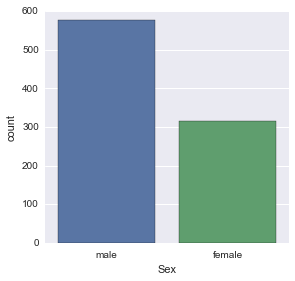

In [8]:
#Check out a quick gender factor plot
sns.factorplot('Sex',data=titanic_df,kind="count")

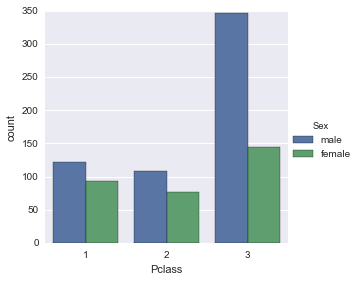

In [9]:
# separate the genders by classes
sns.factorplot('Pclass',data=titanic_df,kind="count",hue="Sex",order=[1,2,3])

In [10]:
# Find the split of male, female and children
# Use the apply technique to create a function
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
#define a new column called person
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [12]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


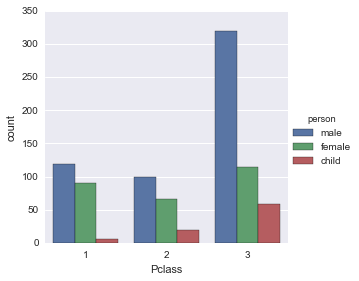

In [13]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person',order=[1,2,3])

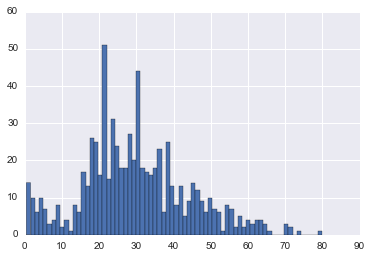

In [14]:
# Lets get a more precise picture of who the passengers were
titanic_df['Age'].hist(bins=70)

In [15]:
#Find the mean age
titanic_df['Age'].mean()

29.69911764705882

In [16]:
# Get an overall comparison of MFC
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

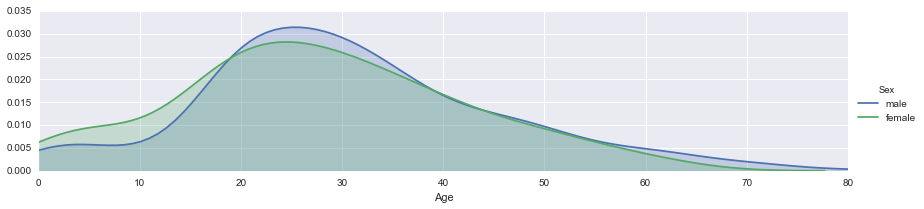

In [17]:
# Use a facet grid and a dataframe
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
#use map to plot all possible kde plots of age columns by hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set x max limit by oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

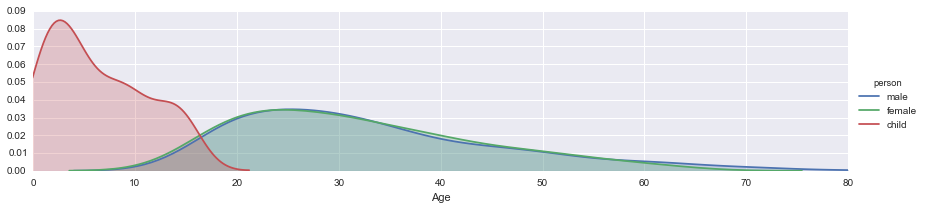

In [18]:
# Same as above, but lets include children
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

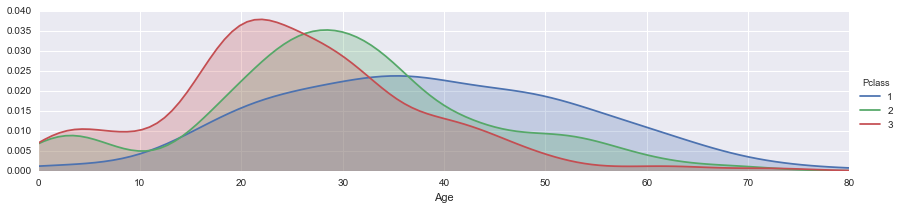

In [19]:
# Same as above, but for classes
fig = sns.FacetGrid(titanic_df,hue='Pclass',hue_order=[1,2,3],aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

# What deck were the passengers on and how does that relate to their class?

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [29]:
# Lets clean up the null values in cabin
deck = titanic_df['Cabin'].dropna()

In [30]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

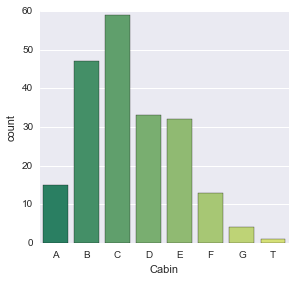

In [40]:
# We only need the letter of the deck for this, create a for loop
#create an empty list
levels = []

#For every level in the deck, appended the first letter
for level in deck:
    levels.append(level[0])

#set the columns equal to cabin    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

#use a factor plot
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='summer',order=('A','B','C','D','E','F','G','T'))

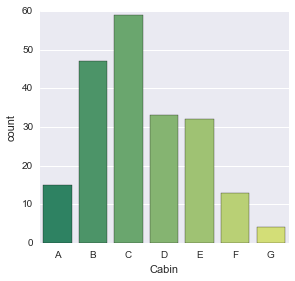

In [42]:
cabin_df = cabin_df[cabin_df.Cabin !='T']
#Replot the chart without T
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='summer',order=('A','B','C','D','E','F','G'))

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,decky,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN,NaN


# Where did the passengers come from?


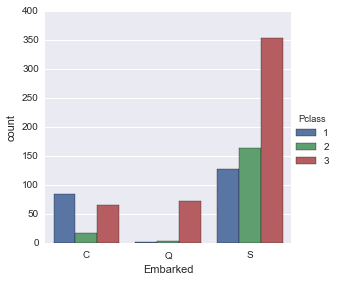

In [45]:
#make a factor plot to see where the passengers came from
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',x_order=['C','Q','S'],hue_order=[1,2,3])

In [46]:
#almost all the passengers that boarded at queenstown were third class

# Who was alone and who was with family?

In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,decky,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN,NaN


In [48]:
#make a new column to define Alone, if 0 then they had either sibling, parent or child with them
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [49]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [50]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

C:\Users\Data.Steve-PC\Python\Anaconda\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,decky,deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,NaN,NaN,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,C85,C85,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,NaN,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,C123,C123,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,NaN,NaN,Alone


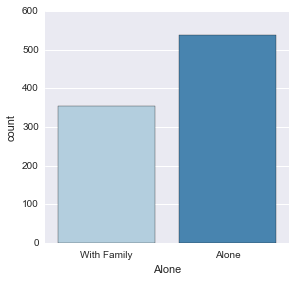

In [52]:
# Lets make a visualization
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

# What factors helped someone survive the sinking?

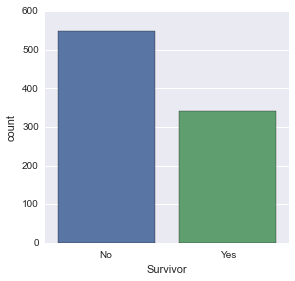

In [53]:
#make a new column called survivor
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

sns.factorplot('Survivor',data=titanic_df,kind='count')

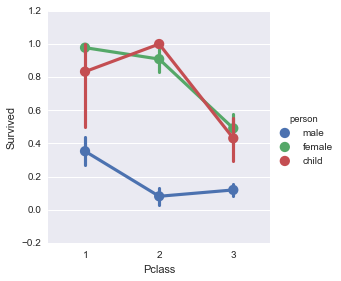

In [54]:
# Was class a factor in survival?
#Lets consider gender too
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person',order=[1,2,3])

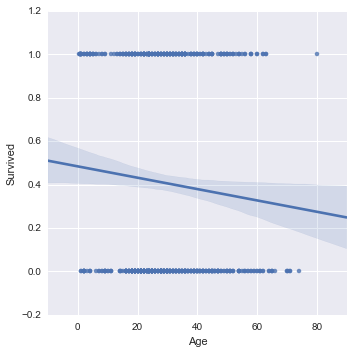

In [55]:
#looks like being male dramatically has a condition on your survival
sns.lmplot('Age','Survived',data=titanic_df)

In [56]:
# Theres a trend that the older a person was, the lower the chances of survival

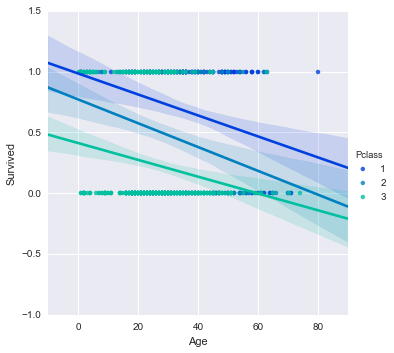

In [57]:
# Use class as a hue
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter',hue_order=[1,2,3])

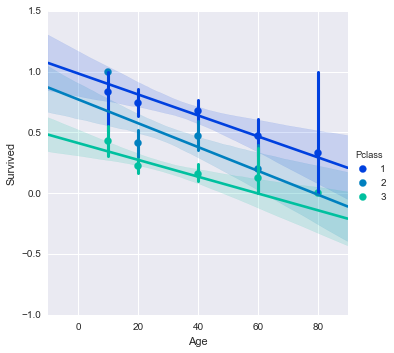

In [58]:
# make some age bins to help
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations,hue_order=[1,2,3])

In [59]:
# there's a high standard deviation on the older people that survived


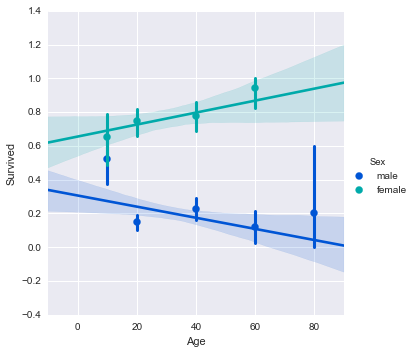

In [60]:
# a plot to compare gender and age

sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [61]:
# looks like an older female, you had a better chance of surviving